In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
df=pd.read_csv('C:/Users/CVR/Desktop/22B81A12C2_COE/22-03-2025/marketing_campaign1.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Handle missing values
df['Income'].fillna(df['Income'].median(), inplace=True)


In [5]:
# Convert date column and calculate tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['Customer_Tenure'] = (df['Dt_Customer'].max() - df['Dt_Customer']).dt.days
df.drop(columns=['Dt_Customer'], inplace=True)

In [6]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


In [7]:
# Drop irrelevant or constant columns
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

In [8]:
# Scale numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display processed dataset
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,True,False,False,False,False,False,True,False,False,False
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,True,False,False,False,False,False,True,False,False,False
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,True,False,False,False,False,False,False,True,False,False
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,True,False,False,False,False,False,False,True,False,False
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,False,False,True,False,False,True,False,False,False,False


In [9]:
numerical_features = df.select_dtypes(include=[np.number])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)



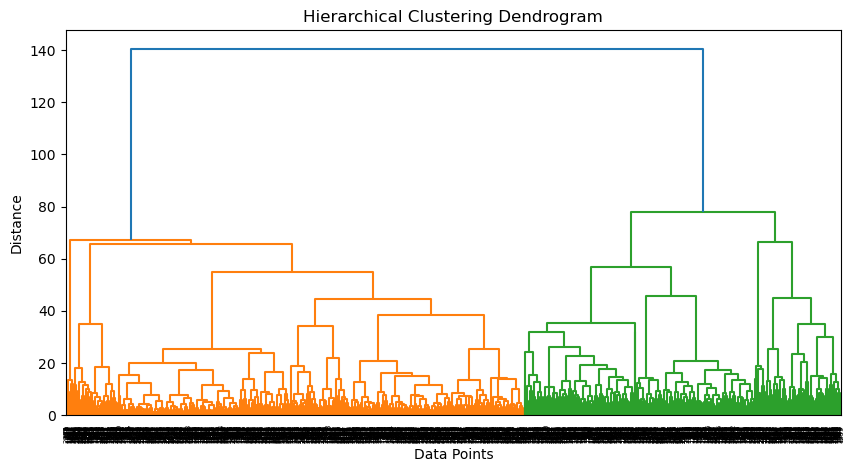

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Hierarchical Clustering
linkage_matrix = linkage(scaled_data, method='ward')
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hc.fit_predict(scaled_data)

# Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

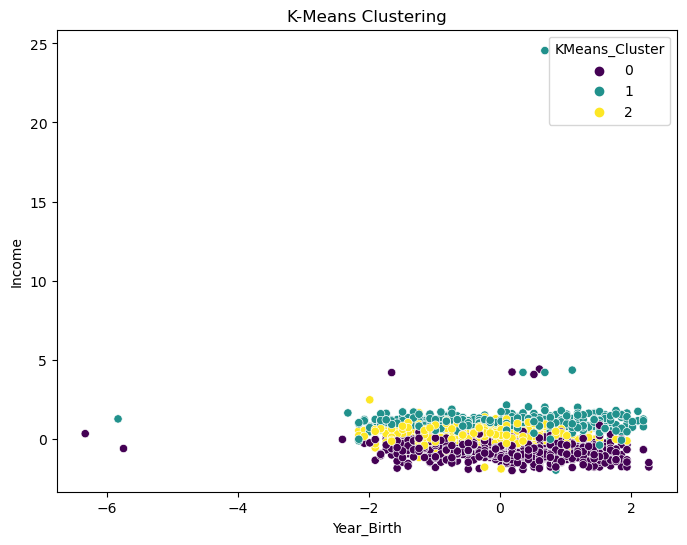

In [11]:
# Scatter plot of clusters (modify feature indices if needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['KMeans_Cluster'], palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel(numerical_features.columns[0])
plt.ylabel(numerical_features.columns[1])
plt.show()